In [1]:
# import os
# os.chdir('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [3]:
# Load dataset
def load_data(filepath):
    data = pd.read_csv(filepath)
    return data


In [4]:
filepath = 'large_simulated_satelitte_data.csv'

df = load_data(filepath)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Timestamp             100000 non-null  object 
 1   Latitude (degrees)    100000 non-null  float64
 2   Longitude (degrees)   100000 non-null  float64
 3   Altitude (meters)     100000 non-null  float64
 4   Speed (m/s)           100000 non-null  float64
 5   Direction (degrees)   100000 non-null  float64
 6   Signal Strength (dB)  100000 non-null  float64
 7   Temperature (°C)      100000 non-null  float64
 8   Humidity (%)          100000 non-null  float64
 9   Accel X (g)           100000 non-null  float64
 10  Accel Y (g)           100000 non-null  float64
 11  Accel Z (g)           100000 non-null  float64
 12  Gyro X (°/s)          100000 non-null  float64
 13  Gyro Y (°/s)          100000 non-null  float64
 14  Gyro Z (°/s)          100000 non-null  float64
dtypes

In [6]:
df.drop('Timestamp', axis=1, inplace=True)

In [7]:
df.head()

,Latitude (degrees),Longitude (degrees),Altitude (meters),Speed (m/s),Direction (degrees),Signal Strength (dB),Temperature (°C),Humidity (%),Accel X (g),Accel Y (g),Accel Z (g),Gyro X (°/s),Gyro Y (°/s),Gyro Z (°/s)
0,-39.328869,-130.460820,419651.594569,7455.266904,272.669015,-137.147839,-68.968800,0.380783,0.004040,-0.001326,0.001446,0.007182,-0.003271,0.001843
1,-39.290038,-130.398314,419637.105788,7590.563695,73.577059,-142.454825,-44.237531,0.635227,0.006213,0.003572,0.009074,0.001861,0.001756,0.004308
2,-39.251168,-130.335882,419622.605958,7512.743067,309.134267,-137.196830,23.350556,0.956095,-0.002078,0.005280,0.002577,0.006936,-0.001514,0.001198
3,-39.212260,-130.273523,419608.095144,7465.972065,11.231261,-141.979573,-82.915576,0.945623,0.009870,0.011500,-0.004871,-0.000846,0.002586,0.006551
4,-39.173314,-130.211237,419593.573410,7578.184097,104.386333,-153.977930,32.839461,0.688654,0.023137,-0.007570,0.005351,-0.001647,0.002220,0.007319


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(100000, 14)

In [10]:
# Preprocessing function
def preprocess_data(data):
    features = data.drop('Signal Strength (dB)', axis=1)
    target = data['Signal Strength (dB)']

    # Normalizing/Standardizing features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    return (scaler, (X_train, X_test, y_train, y_test))

In [11]:
scaler, splits = preprocess_data(df)

print(len(splits))

4


In [12]:
X_train, X_test, y_train, y_test = splits

In [13]:
X_train

array([[ 0.95596387,  0.9767269 , -0.35410133, ...,  1.17907252,
        -0.04064364,  1.90888479],
       [-1.14210101, -0.72890344,  1.05230156, ...,  1.10548384,
         0.84328385, -2.11500542],
       [-0.51324338,  0.63577139, -0.74026886, ...,  0.29184646,
        -0.20933284,  0.42016317],
       ...,
       [-1.20034939,  1.66247916,  1.21935484, ..., -0.0390395 ,
         0.32927441,  0.34800173],
       [ 0.0443237 , -0.89160964, -1.39079357, ..., -0.06266781,
        -1.07345669, -0.9262311 ],
       [-1.33861621,  0.79505667,  1.57254236, ...,  0.6863421 ,
         1.92112059, -0.05392213]])

In [14]:
y_train

,Signal Strength (dB)
75220,-132.054226
48955,-139.155614
44966,-142.315223
13568,-125.405140
92727,-136.581164
...,...
6265,-142.779213
54886,-138.642129
76820,-141.848253
860,-143.061958


In [15]:
# Evaluation function with metrics storage
def evaluate_model(y_test, y_pred, model_name, metrics_dict):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    metrics_dict['Model'].append(model_name)
    metrics_dict['MSE'].append(mse)
    metrics_dict['RMSE'].append(rmse)
    metrics_dict['R²'].append(r2)
    metrics_dict['y_pred'].append(y_pred)
    metrics_dict['y_true'].append(y_test)

    print(f"{model_name} - Mean Squared Error: {mse}, RMSE: {rmse}, R² Score: {r2}")



In [34]:
def plot_metrics(metrics_dict):
    df_metrics = pd.DataFrame(metrics_dict)
    num_models = len(df_metrics['Model'])

    fig, ax = plt.subplots(3, num_models, figsize=(6 * num_models, 15))

    # Bar plots
    df_metrics.plot(kind='bar', x='Model', y='MSE', ax=ax[0, 0], color='skyblue', legend=False)
    ax[0, 0].set_title('Mean Squared Error (Bar)')
    ax[0, 0].set_ylabel('MSE')

    df_metrics.plot(kind='bar', x='Model', y='RMSE', ax=ax[0, 1], color='lightgreen', legend=False)
    ax[0, 1].set_title('Root Mean Squared Error (Bar)')
    ax[0, 1].set_ylabel('RMSE')

    df_metrics.plot(kind='bar', x='Model', y='R²', ax=ax[0, 2], color='salmon', legend=False)
    ax[0, 2].set_title('R² Score (Bar)')
    ax[0, 2].set_ylabel('R²')

    # Line plots
    df_metrics.plot(kind='line', x='Model', y='MSE', ax=ax[1, 0], color='blue', marker='o', legend=False)
    ax[1, 0].set_title('Mean Squared Error (Line)')
    ax[1, 0].set_ylabel('MSE')

    df_metrics.plot(kind='line', x='Model', y='RMSE', ax=ax[1, 1], color='green', marker='o', legend=False)
    ax[1, 1].set_title('Root Mean Squared Error (Line)')
    ax[1, 1].set_ylabel('RMSE')

    df_metrics.plot(kind='line', x='Model', y='R²', ax=ax[1, 2], color='red', marker='o', legend=False)
    ax[1, 2].set_title('R² Score (Line)')
    ax[1, 2].set_ylabel('R²')

    # Scatter plots for y_pred vs y_true
    for i, model in enumerate(df_metrics['Model']):
        if num_models > 1:
            ax[2, i].scatter(df_metrics['y_true'].iloc[i], df_metrics['y_pred'].iloc[i], alpha=0.5)
            ax[2, i].set_title(f'{model}: y_pred vs y_true')
            ax[2, i].set_xlabel('y_true')
            ax[2, i].set_ylabel('y_pred')
        else:
            ax[2].scatter(df_metrics['y_true'].iloc[i], df_metrics['y_pred'].iloc[i], alpha=0.5)
            ax[2].set_title(f'{model}: y_pred vs y_true')
            ax[2].set_xlabel('y_true')
            ax[2].set_ylabel('y_pred')

    plt.tight_layout()
    plt.show()

In [17]:
def linear_regression_model(X_train, y_train, X_test, y_test, metrics_dict):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluate_model(y_test, y_pred, 'Linear Regression', metrics_dict)

In [18]:
def decision_tree_model(X_train, y_train, X_test, y_test, metrics_dict):
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluate_model(y_test, y_pred, 'Decision Tree Regressor', metrics_dict)

In [19]:
def random_forest_model(X_train, y_train, X_test, y_test, metrics_dict):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluate_model(y_test, y_pred, 'Random Forest Regressor', metrics_dict)

In [20]:
def gradient_boosting_model(X_train, y_train, X_test, y_test, metrics_dict):
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluate_model(y_test, y_pred, 'Gradient Boosting Regressor', metrics_dict)

In [21]:

def support_vector_regressor_model(X_train, y_train, X_test, y_test, metrics_dict):
    model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluate_model(y_test, y_pred, 'Support Vector Regressor', metrics_dict)

In [22]:
def xgboost_model(X_train, y_train, X_test, y_test, metrics_dict):
    model = XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluate_model(y_test, y_pred, 'XGBoost Regressor', metrics_dict)

In [23]:
def keras_regressor_model(X_train, y_train, X_test, y_test, metrics_dict):
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

    y_pred = model.predict(X_test)

    evaluate_model(y_test, y_pred, 'Keras Regressor', metrics_dict)

In [24]:
metrics_dict = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'R²': [],
    'y_pred': [],
    'y_true': []
}

In [25]:
linear_regression_model(X_train, y_train, X_test, y_test, metrics_dict)


Linear Regression - Mean Squared Error: 25.083490698740132, RMSE: 5.008342110792765, R² Score: -3.8490208404295956e-05


In [26]:
decision_tree_model(X_train, y_train, X_test, y_test, metrics_dict)


Decision Tree Regressor - Mean Squared Error: 52.456932267264996, RMSE: 7.2427158074347355, R² Score: -1.0913736439464174


In [27]:
random_forest_model(X_train, y_train, X_test, y_test, metrics_dict)


Random Forest Regressor - Mean Squared Error: 25.455687551511197, RMSE: 5.045362975199227, R² Score: -0.014877380982254662


In [28]:
gradient_boosting_model(X_train, y_train, X_test, y_test, metrics_dict)


Gradient Boosting Regressor - Mean Squared Error: 25.114024779186384, RMSE: 5.011389505834323, R² Score: -0.0012558349582283412


In [29]:
xgboost_model(X_train, y_train, X_test, y_test, metrics_dict)


XGBoost Regressor - Mean Squared Error: 26.040189386957667, RMSE: 5.10295888548572, R² Score: -0.03818053045471981


In [30]:
keras_regressor_model(X_train, y_train, X_test, y_test, metrics_dict)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 19456.8965 - val_loss: 19013.9551
Epoch 2/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 18841.7949 - val_loss: 18402.7480
Epoch 3/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 18231.0137 - val_loss: 17802.0195
Epoch 4/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 17629.8574 - val_loss: 17211.4746
Epoch 5/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 17040.3633 - val_loss: 16630.9766
Epoch 6/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 16460.6680 - val_loss: 16060.5107
Epoch 7/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 15899.9131 - val_loss: 15500.1240
Epoch 8/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 15341.3428 - val_loss: 14949.7861
Epoch 9/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 14800.9814 - val_loss: 14409.4736
Epoch 10/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 14257.6719 - val_loss: 13879.2393
Epoch 11/100
2250/2250 ━━━━━━

In [32]:
metrics_dict

{'Model': ['Linear Regression',
  'Decision Tree Regressor',
  'Random Forest Regressor',
  'Gradient Boosting Regressor',
  'XGBoost Regressor',
  'Keras Regressor'],
 'MSE': [25.083490698740132,
  52.456932267264996,
  25.455687551511197,
  25.114024779186384,
  26.040189386957667,
  25.08252749091973],
 'RMSE': [5.008342110792765,
  7.2427158074347355,
  5.045362975199227,
  5.011389505834323,
  5.10295888548572,
  5.0082459495236185],
 'R²': [-3.8490208404295956e-05,
  -1.0913736439464174,
  -0.014877380982254662,
  -0.0012558349582283412,
  -0.03818053045471981,
  -8.86595115101585e-08],
 'y_pred': [array([-140.02800934, -139.94720798, -140.0358031 , ..., -139.87750552,
         -139.93149823, -139.8786627 ]),
  array([-138.22192048, -140.97892015, -142.47354716, ..., -133.41244187,
         -138.19850286, -137.36872503]),
  array([-139.4363182 , -139.81983252, -141.17957903, ..., -140.07719797,
         -140.08629489, -139.36230122]),
  array([-139.94107527, -139.96174632, -139.9

In [36]:
metrics_dict.keys()

dict_keys(['Model', 'MSE', 'RMSE', 'R²', 'y_pred', 'y_true'])

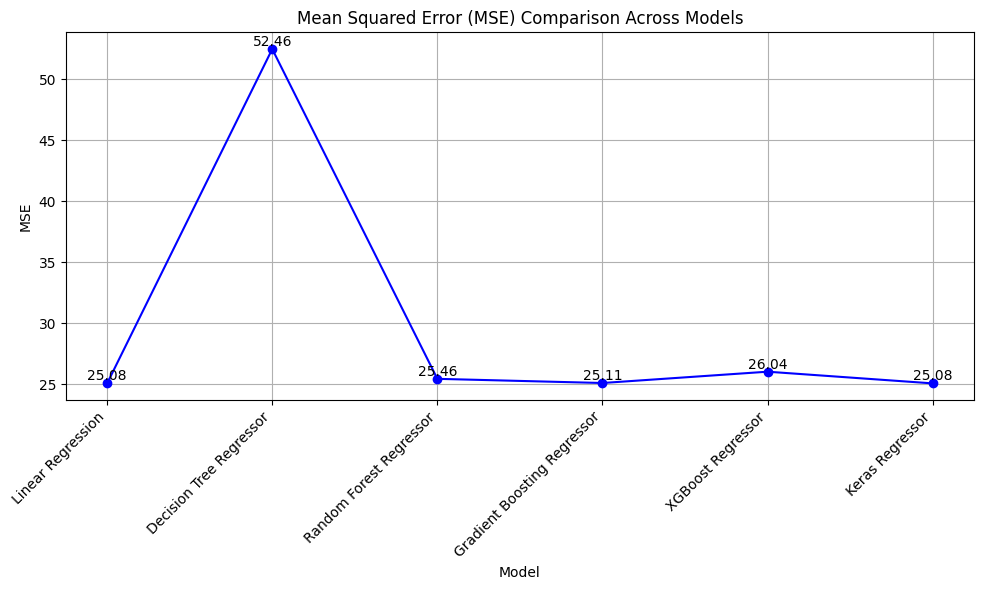

In [38]:
def plot_mse_line(metrics_dict):
    df_metrics = pd.DataFrame(metrics_dict)

    # Plotting MSE for each model
    plt.figure(figsize=(10, 6))

    plt.plot(df_metrics['Model'], df_metrics['MSE'], marker='o', linestyle='-', color='blue')

    # Annotating points with the MSE values
    for i in range(len(df_metrics)):
        plt.text(df_metrics['Model'][i], df_metrics['MSE'][i], round(df_metrics['MSE'][i], 2),
                 ha='center', va='bottom')

    plt.title('Mean Squared Error (MSE) Comparison Across Models')
    plt.xlabel('Model')
    plt.ylabel('MSE')
    plt.grid(True)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


plot_mse_line(metrics_dict)

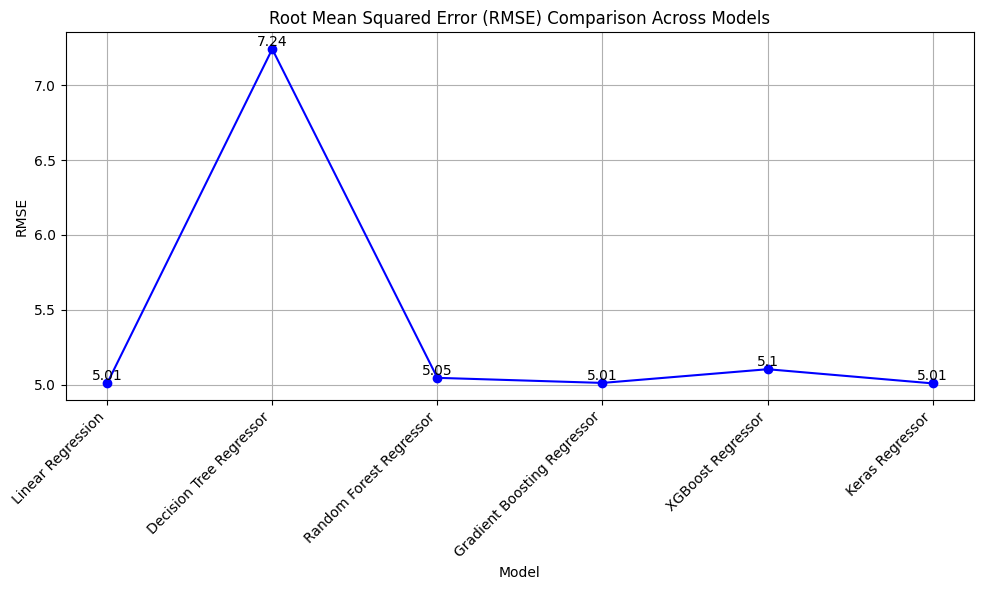

In [41]:
def plot_rmse_line(metrics_dict):
    df_metrics = pd.DataFrame(metrics_dict)

    # Plotting MSE for each model
    plt.figure(figsize=(10, 6))

    plt.plot(df_metrics['Model'], df_metrics['RMSE'], marker='o', linestyle='-', color='blue')

    # Annotating points with the MSE values
    for i in range(len(df_metrics)):
        plt.text(df_metrics['Model'][i], df_metrics['RMSE'][i], round(df_metrics['RMSE'][i], 2),
                 ha='center', va='bottom')

    plt.title('Root Mean Squared Error (RMSE) Comparison Across Models')
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.grid(True)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


plot_rmse_line(metrics_dict)

In [42]:
def plot_scatter_ytrue_ypred(metrics_dict, model_name):
    df_metrics = pd.DataFrame(metrics_dict)

    # Find the index of the selected model
    model_idx = df_metrics[df_metrics['Model'] == model_name].index[0]

    y_true = df_metrics['y_true'].iloc[model_idx]
    y_pred = df_metrics['y_pred'].iloc[model_idx]

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue')

    plt.title(f'Scatter Plot: {model_name} - y_true vs y_pred')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')

    # Plotting a line y = x for reference
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red')

    plt.grid(True)
    plt.show()


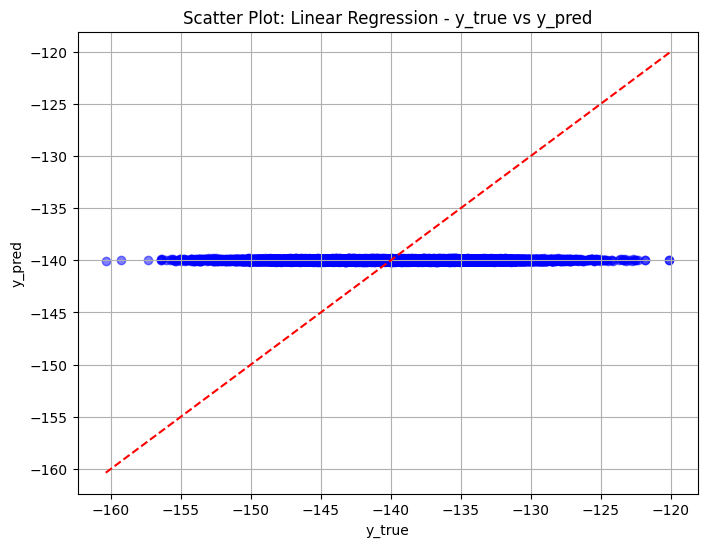

In [43]:
plot_scatter_ytrue_ypred(metrics_dict, 'Linear Regression')

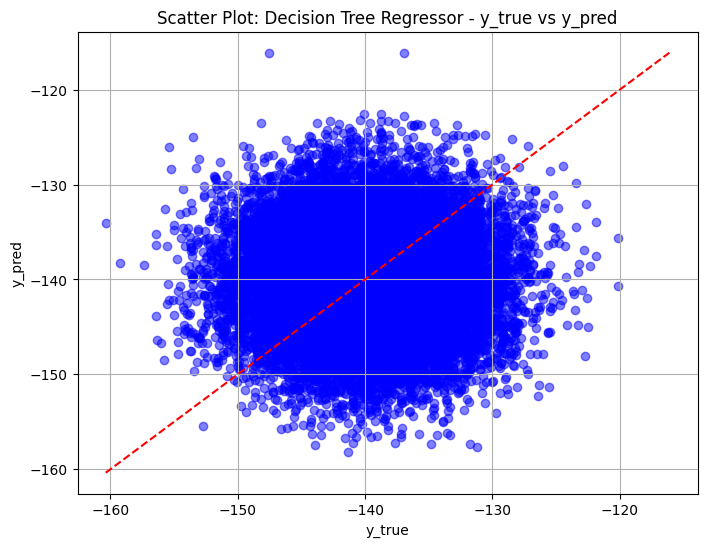

In [44]:
plot_scatter_ytrue_ypred(metrics_dict, 'Decision Tree Regressor')

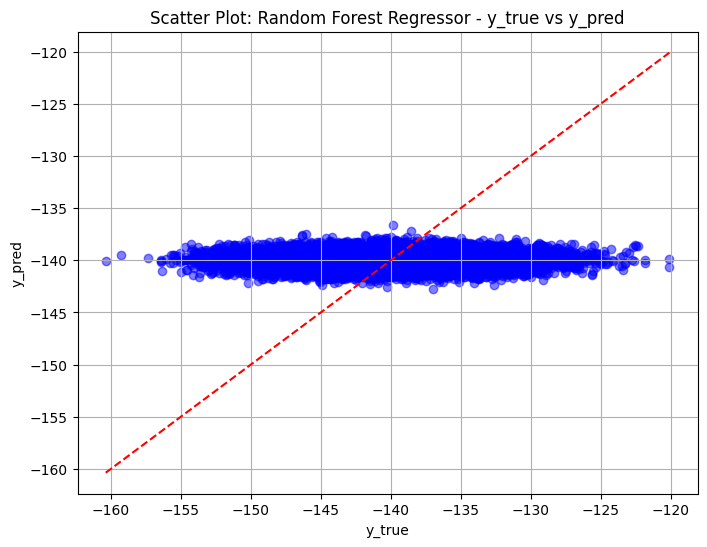

In [45]:
plot_scatter_ytrue_ypred(metrics_dict, 'Random Forest Regressor')

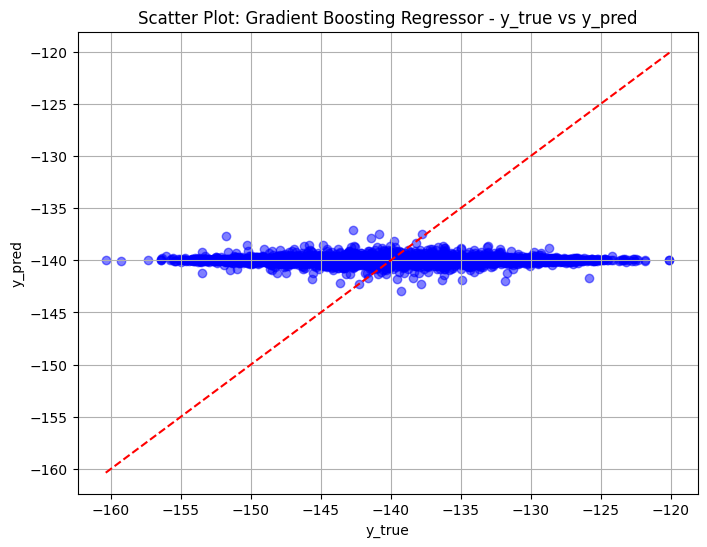

In [46]:
plot_scatter_ytrue_ypred(metrics_dict, 'Gradient Boosting Regressor')

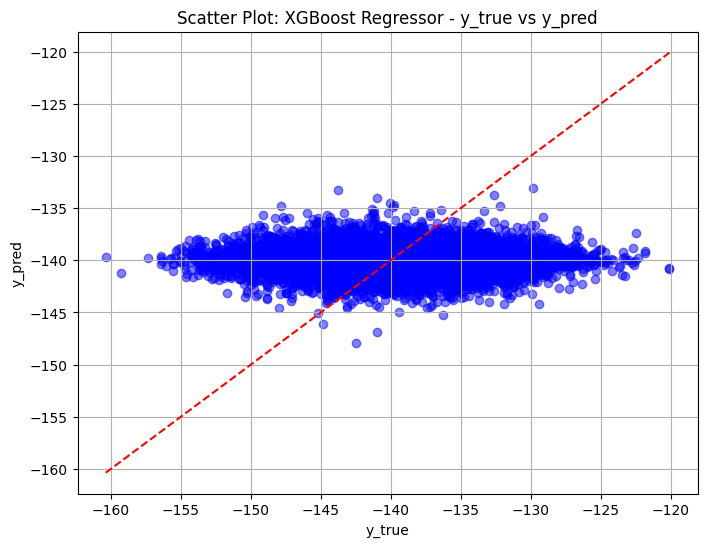

In [48]:
plot_scatter_ytrue_ypred(metrics_dict, 'XGBoost Regressor')

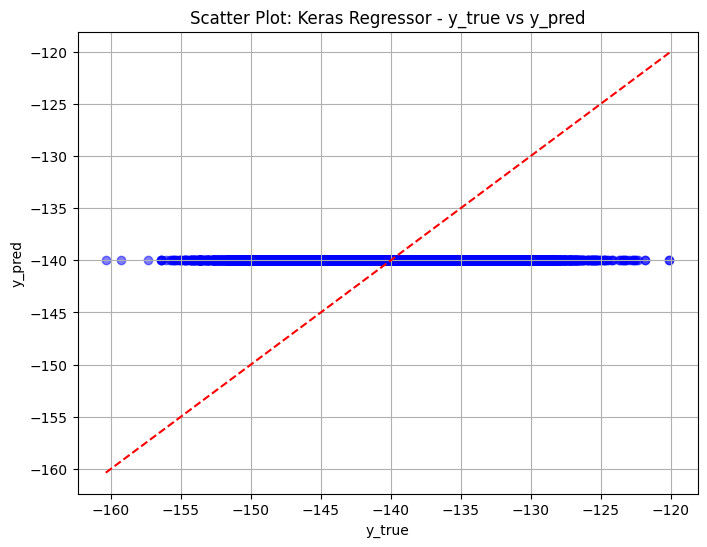

In [49]:
plot_scatter_ytrue_ypred(metrics_dict, 'Keras Regressor')